In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
# IMDB 데이터셋(영화 리뷰를 긍정vs부정 두 분류로 나온 데이터)
# 단어 데이터가 숫자 시퀀스로 변환되어 있다.
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0])
print(train_data.shape)
print(test_data.shape)
print(test_labels.shape)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(25000,)
(25000,)
(25000,)


In [4]:
# 가장 자주 등장하는 단어 1만개로 제한했기 때문에 인덱스는 1만을 넘지 않는다.
max([max(sequence) for sequence in train_data])

9999

In [5]:
# 리뷰데이터 중 하나를 원래 영어 단어로 바꿔보기.

# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review # train_data[0]에서 단어와 정수인덱스를 뒤집어 원래 글을 보여준거임

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

<br>

## 데이터 준비
- <b>신경망에는 숫자 리스트를 주입할 수 없다.</b> 
- <b>리스트를 텐서 형태</b>
    1. 같은 길이가 되도록 '패딩' 추가.
    2. 리스트를 원-핫 인코딩 하여 0과 1의 벡터로 변환

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.     # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
        return results
    
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# 레이블을 벡터로 바꾸기

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

# 중간 은닉층은 ReLU로 활성화 함수 사용하고, 마지막 층은 확률로서 출력하기 위해 시그모이드 사용(스칼라 값으로 출력)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 이진 분류 모델에 적합한 loss function 선정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# 케라스는 'abcd' 처럼 지정도 가능하지만, 매개변수를 바꾸거나 자신만의 조합으로 바꿀 수 있다. 
# 아래는 직접 Optimizer를 불러와, Learning Rate를 변경했다.

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 손실함수와 측정지표를 매개변수 안에 함수객체를 넣었다.

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
# 원본 훈련 데이터에서 10,000개의 샘플을 따로 떼어서 검증세트(Validation set)만들었다.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 437us/step - loss: 0.6932 - acc: 0.4982 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 4s 287us/step - 

- model.fit() 메서드는 History 객체를 반환합니다.
- 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있습니다. 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

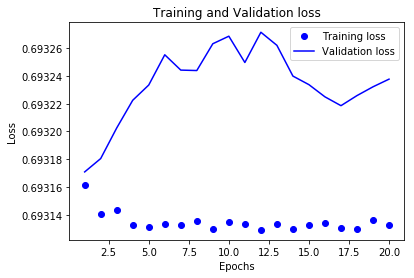

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

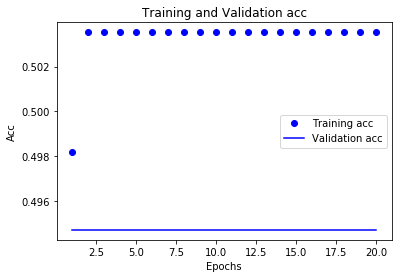

In [16]:
plt.clf    # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc') # 'bo'는 파란색 점
plt.plot(epochs, val_acc, 'b', label='Validation acc') # 'b'는 파란색 선
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()


In [19]:
# 모델 다시 훈련시키고 예측해보기

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

model.predict(x_test)


Epoch 1/4
25000/25000 [==============================] - 6s 237us/step - loss: 0.6932 - acc: 0.4991
Epoch 2/4
25000/25000 [==============================] - 4s 175us/step - loss: 0.6932 - acc: 0.4961
Epoch 3/4
25000/25000 [==============================] - 4s 172us/step - loss: 0.6932 - acc: 0.4999
Epoch 4/4
25000/25000 [==============================] - 8s 305us/step


array([[0.5075595 ],
       [0.49975133],
       [0.49975133],
       ...,
       [0.49975133],
       [0.49975133],
       [0.49975133]], dtype=float32)